# Post-Training: Experimental Place Cells


This notebook compares the place cells entering the training pipeline, to the place cells reconstructed by the decoder.

## Setup

In [1]:
import os
import subprocess

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "neuralgeom"))
print("Working directory: ", os.getcwd())

import warnings

warnings.filterwarnings("ignore")

import sys

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

Working directory:  /Volumes/GoogleDrive/My Drive/code/neuralgeom/neuralgeom
Directory added to path:  /Volumes/GoogleDrive/My Drive/code/neuralgeom
Directory added to path:  /Volumes/GoogleDrive/My Drive/code/neuralgeom/neuralgeom


## Imports

In [2]:
import datasets.experimental as experimental
import matplotlib.pyplot as plt
import numpy as np
import torch

TRAINED_MODELS = os.path.join(os.getcwd(), "results/trained_models")
print(f"Available trained models in directory: {TRAINED_MODELS}")
for model_path in os.listdir(TRAINED_MODELS):
    print("-", model_path)

INFO: Using pytorch backend


Available trained models in directory: /Volumes/GoogleDrive/My Drive/code/neuralgeom/neuralgeom/results/trained_models
- 2022-12-30 14:51:00_s1_synthetic_run_f6lf1kqb_model.pt
- 2022-12-30 14:51:00_s1_synthetic_run_moqyd9pq_model.pt
- 2022-12-30 14:51:00_s1_synthetic_run_zpuaxz74_model.pt
- 2022-12-30 14:51:00_s1_synthetic_run_9as5jt1n_model.pt
- 2022-12-30 14:51:00_s1_synthetic_run_pnxol6cm_model.pt
- 2022-12-30 14:51:00_s1_synthetic_run_yqj4d821_model.pt
- 2022-12-30 14:51:00_s1_synthetic_run_t6esqyz7_model.pt
- 2022-12-30 14:51:00_s1_synthetic_run_exe5ao7e_model.pt
- 2022-12-30 14:51:00_s1_synthetic_run_7161z7gq_model.pt
- 2022-12-30 14:51:00_s1_synthetic_run_rig5rbxv_model.pt
- 2022-12-30 14:51:00_experimental_41_gain_1_run_nnl6pw1z_model.pt
- 2022-12-30 14:51:00_experimental_41_gain_1_run_u91lhsuk_model.pt
- 2022-12-30 14:51:00_experimental_41_gain_1_run_k1q4zzp7_model.pt
- 2022-12-30 14:51:00_experimental_41_gain_1_run_nxnsx6xb_model.pt
- 2022-12-30 14:51:00_experimental_41_gain_

## Plot experimental place cell activity at each angle

In [3]:
expt_id = 41
timestep_ns = int(1e6)

print(f"Loading experiment {expt_id}...")
place_cells, labels = experimental.load_place_cells(
    expt_id=expt_id, timestep_microsec=timestep_ns
)

thetas = np.array(labels["angles"])
sort = np.argsort(thetas)
sorted_thetas = thetas[sort]

sorted_place_cells = place_cells[sort, :]

INFO: # - Found file at data/binned/expt41_times_timestep1000000.txt! Loading...
INFO: # - Found file at data/binned/expt41_place_cells_timestep1000000.npy! Loading...
INFO: # - Found file at data/binned/expt41_labels_timestep1000000.txt! Loading...


Loading experiment 41...


In [4]:
print(place_cells.shape)
print(sorted_place_cells.shape)

(3882, 12)
(3882, 12)


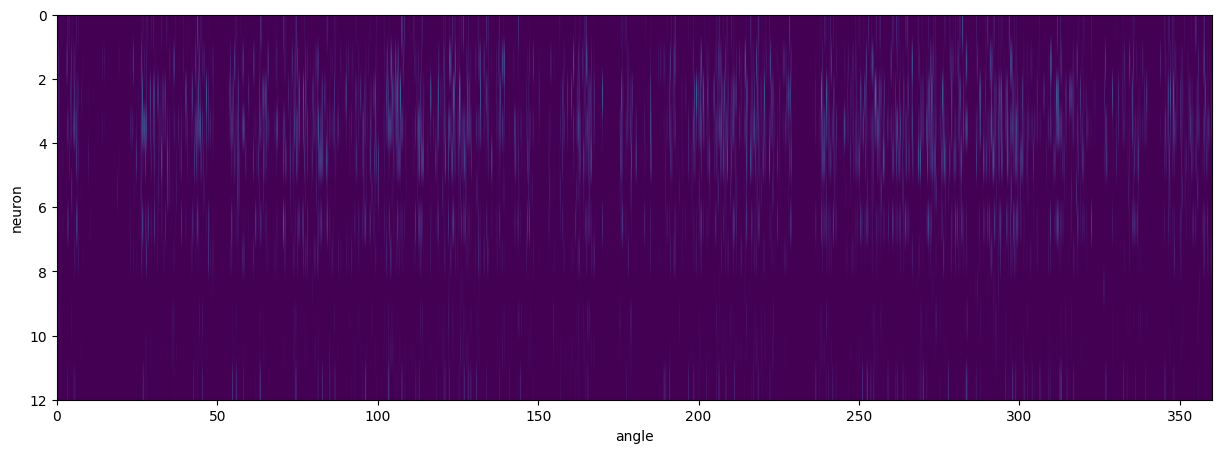

In [5]:
plt.figure(figsize=(20, 5))
plt.xlabel("angle")
plt.ylabel("neuron")

plt.imshow(
    sorted_place_cells.T, extent=[0, 360, sorted_place_cells.shape[1], 0], aspect=10
);

## Inspect reconstructed place cells

We chose a trained model and inspect the reconstructed place cell activity.

In [6]:
model_path = os.path.join(
    TRAINED_MODELS,
    # Choose from experiment 41
    "2022-12-30 14:51:00_experimental_41_gain_1_run_nnl6pw1z_model.pt",
)
model = torch.load(model_path)

dataset = torch.Tensor(place_cells)
z, recon, posterior_params = model(dataset)

recon = recon.detach().numpy()
sorted_recon = recon[sort, :]

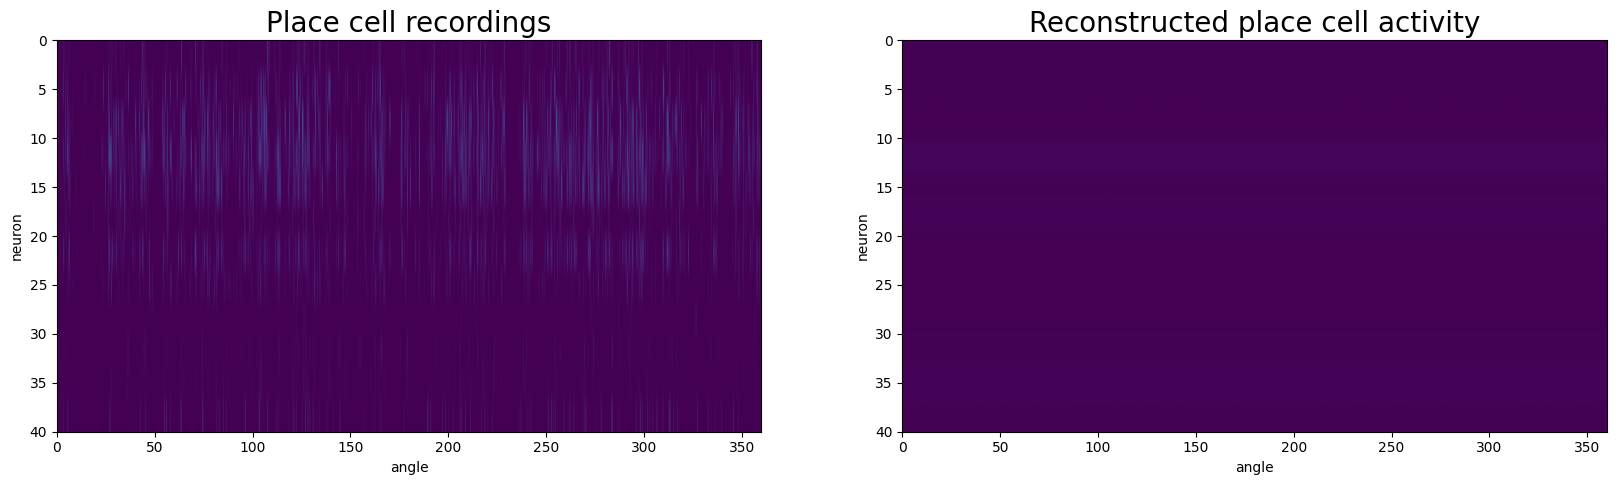

In [7]:
import matplotlib as mpl

color_norm = mpl.colors.Normalize(0.0, np.max(sorted_place_cells))

fig = plt.figure(figsize=(20, 10))

ax_data = fig.add_subplot(121)

ax_data.set_xlabel("angle")
ax_data.set_ylabel("neuron")

ax_data.set_title("Place cell recordings", fontsize=20)

im_data = ax_data.imshow(
    sorted_place_cells.T,
    extent=[0, 360, 40, 0],
    aspect=5,
    norm=color_norm,
    cmap="viridis",
)

ax_rec = fig.add_subplot(122)

ax_rec.set_xlabel("angle")
ax_rec.set_ylabel("neuron")

ax_rec.set_title("Reconstructed place cell activity", fontsize=20)

im_rec = ax_rec.imshow(
    sorted_recon.T, extent=[0, 360, 40, 0], aspect=5, norm=color_norm, cmap="viridis"
)

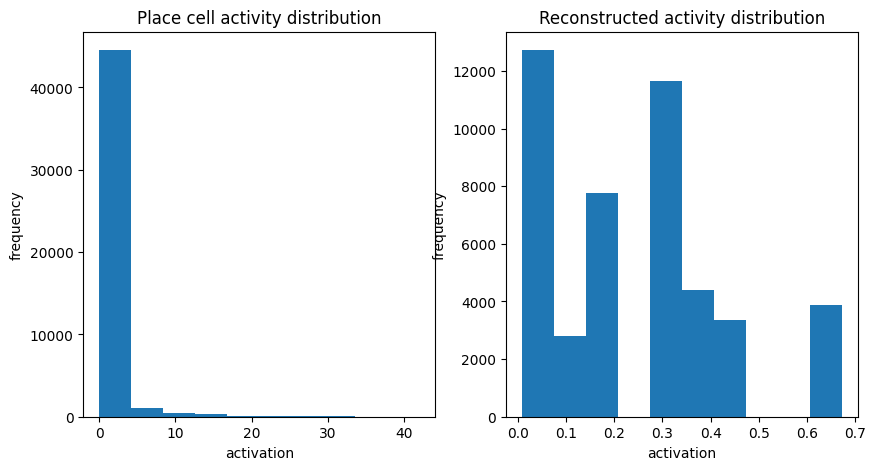

In [8]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121)

ax1.hist(sorted_place_cells.flatten())

ax2 = fig.add_subplot(122)

ax2.hist(sorted_recon.flatten())

ax1.set_xlabel("activation")

ax1.set_ylabel("frequency")

ax2.set_xlabel("activation")

ax2.set_ylabel("frequency")

ax1.set_title("Place cell activity distribution")

ax2.set_title("Reconstructed activity distribution");